<h2>Data analysis</h2>
<p>Student: Aida Tulegenova<br>
Group: ITML-1901</p>

<h3>Importing moduls for first look at the data</h3>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('marketing_campaign.csv', delimiter=';')
df.head()

ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  2012-09-04       58       635  ...                  7             0   
1  2014-03-08       38        11  ...                  5             0   
2  2013-08-21       26       426  ...                  4             0   
3  2014-02-10       26        11  ...                  6             0   
4  2014-01-19       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0             0             0             0         0   
1             0             0             0             0         0   
2             0             0             0             0         0   
3             0             0             0             0         0   
4             0             0             0             0         0   

   Z_CostContact  Z_Revenue  Response  
0              3         11         1  
1              3         11         0  
2              3         11         0  
3              3         11         0  
4              3         11         0  

[5 rows x 29 columns]

I will add a description of the fields to make it easier to navigate 

AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain - 1 if customer complained in the last 2 years
DtCustomer - date of customer’s enrolment with the company
Education - customer’s level of education
Marital - customer’s marital status
Kidhome - number of small children in customer’s household
Teenhome - number of teenagers in customer’s household
Income - customer’s yearly household income
MntFishProducts - amount spent on fish products in the last 2 years
MntMeatProducts - amount spent on meat products in the last 2 years
MntFruits - amount spent on fruits products in the last 2 years
MntSweetProducts - amount spent on sweet products in the last 2 years
MntWines - amount spent on wine products in the last 2 years
MntGoldProds - amount spent on gold products in the last 2 years
NumDealsPurchases - number of purchases made with discount
NumCatalogPurchases - number of purchases made using catalogue
NumStorePurchases - number of purchases made directly in stores
NumWebPurchases - number of purchases made through company’s web site
NumWebVisitsMonth - number of visits to company’s web site in the last month
Recency - number of days since the last purchase

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [6]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

Our data is pretty clean except for the Income column where there are only 24 missing data that we can remove.

In [8]:
df.dtypes.value_counts()

int64      25
object      3
float64     1
dtype: int64

Now we see such a picture that we have only 3 objects and the rest of the columns we have are numeric, now we will check for uniqueness in order to identify as many columns as possible that are categorical. 

In [9]:
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1974
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [19]:
categorical = [
    'Education',
    'Marital_Status',
    'Kidhome',
    'Teenhome',
    'AcceptedCmp3',
    'AcceptedCmp4',
    'AcceptedCmp5',
    'AcceptedCmp1',
    'AcceptedCmp2',
    'Complain',
    'Response'
]

numerical = [
    'Year_Birth',
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth'
]

numerical_resp = [
    'Year_Birth',
    'Income',
    'Recency',
    'MntWines',
    'MntFruits',
    'MntMeatProducts',
    'MntFishProducts',
    'MntSweetProducts',
    'MntGoldProds',
    'NumDealsPurchases',
    'NumWebPurchases',
    'NumCatalogPurchases',
    'NumStorePurchases',
    'NumWebVisitsMonth',
    'Response'
]

<h3>Analysis</h3>

In [14]:
df[numerical].describe().T

count          mean           std     min       25%  \
Year_Birth           2240.0   1968.805804     11.984069  1893.0   1959.00   
Income               2216.0  52247.251354  25173.076661  1730.0  35303.00   
Recency              2240.0     49.109375     28.962453     0.0     24.00   
MntWines             2240.0    303.935714    336.597393     0.0     23.75   
MntFruits            2240.0     26.302232     39.773434     0.0      1.00   
MntMeatProducts      2240.0    166.950000    225.715373     0.0     16.00   
MntFishProducts      2240.0     37.525446     54.628979     0.0      3.00   
MntSweetProducts     2240.0     27.062946     41.280498     0.0      1.00   
MntGoldProds         2240.0     44.021875     52.167439     0.0      9.00   
NumDealsPurchases    2240.0      2.325000      1.932238     0.0      1.00   
NumWebPurchases      2240.0      4.084821      2.778714     0.0      2.00   
NumCatalogPurchases  2240.0      2.662054      2.923101     0.0      0.00   
NumStorePurchases    2240.0      5.790179      3.250958     0.0      3.00   
NumWebVisitsMonth    2240.0      5.316518      2.426645     0.0      3.00   

                         50%       75%       max  
Year_Birth            1970.0   1977.00    1996.0  
Income               51381.5  68522.00  666666.0  
Recency                 49.0     74.00      99.0  
MntWines               173.5    504.25    1493.0  
MntFruits                8.0     33.00     199.0  
MntMeatProducts         67.0    232.00    1725.0  
MntFishProducts         12.0     50.00     259.0  
MntSweetProducts         8.0     33.00     263.0  
MntGoldProds            24.0     56.00     362.0  
NumDealsPurchases        2.0      3.00      15.0  
NumWebPurchases          4.0      6.00      27.0  
NumCatalogPurchases      2.0      4.00      28.0  
NumStorePurchases        5.0      8.00      13.0  
NumWebVisitsMonth        6.0      7.00      20.0

In [15]:
df[numerical].corr(method='pearson')

Year_Birth    Income   Recency  MntWines  MntFruits  \
Year_Birth             1.000000 -0.161791 -0.019871 -0.157773  -0.017917   
Income                -0.161791  1.000000 -0.003970  0.578650   0.430842   
Recency               -0.019871 -0.003970  1.000000  0.016064  -0.004306   
MntWines              -0.157773  0.578650  0.016064  1.000000   0.389637   
MntFruits             -0.017917  0.430842 -0.004306  0.389637   1.000000   
MntMeatProducts       -0.030872  0.584633  0.023056  0.562667   0.543105   
MntFishProducts       -0.041625  0.438871  0.001079  0.399753   0.594804   
MntSweetProducts      -0.018133  0.440744  0.022670  0.386581   0.567164   
MntGoldProds          -0.061818  0.325916  0.016693  0.387516   0.392995   
NumDealsPurchases     -0.060846 -0.083101 -0.001098  0.010940  -0.132114   
NumWebPurchases       -0.145040  0.387878 -0.010726  0.542265   0.296735   
NumCatalogPurchases   -0.121275  0.589162  0.025110  0.635226   0.487917   
NumStorePurchases     -0.128272  0.529362  0.000799  0.642100   0.461758   
NumWebVisitsMonth      0.121139 -0.553088 -0.021445 -0.320653  -0.418383   

                     MntMeatProducts  MntFishProducts  MntSweetProducts  \
Year_Birth                 -0.030872        -0.041625         -0.018133   
Income                      0.584633         0.438871          0.440744   
Recency                     0.023056         0.001079          0.022670   
MntWines                    0.562667         0.399753          0.386581   
MntFruits                   0.543105         0.594804          0.567164   
MntMeatProducts             1.000000         0.568402          0.523846   
MntFishProducts             0.568402         1.000000          0.579870   
MntSweetProducts            0.523846         0.579870          1.000000   
MntGoldProds                0.350609         0.422875          0.369724   
NumDealsPurchases          -0.122415        -0.139361         -0.120100   
NumWebPurchases             0.293761         0.293681          0.348544   
NumCatalogPurchases         0.723827         0.534478          0.490924   
NumStorePurchases           0.479659         0.459855          0.448756   
NumWebVisitsMonth          -0.539470        -0.446003         -0.423294   

                     MntGoldProds  NumDealsPurchases  NumWebPurchases  \
Year_Birth              -0.061818          -0.060846        -0.145040   
Income                   0.325916          -0.083101         0.387878   
Recency                  0.016693          -0.001098        -0.010726   
MntWines                 0.387516           0.010940         0.542265   
MntFruits                0.392995          -0.132114         0.296735   
MntMeatProducts          0.350609          -0.122415         0.293761   
MntFishProducts          0.422875          -0.139361         0.293681   
MntSweetProducts         0.369724          -0.120100         0.348544   
MntGoldProds             1.000000           0.049085         0.421836   
NumDealsPurchases        0.049085           1.000000         0.234185   
NumWebPurchases          0.421836           0.234185         1.000000   
NumCatalogPurchases      0.437697          -0.008617         0.378376   
NumStorePurchases        0.381678           0.068879         0.502713   
NumWebVisitsMonth       -0.250719           0.347633        -0.055846   

                     NumCatalogPurchases  NumStorePurchases  NumWebVisitsMonth  
Year_Birth                     -0.121275          -0.128272           0.121139  
Income                          0.589162           0.529362          -0.553088  
Recency                         0.025110           0.000799          -0.021445  
MntWines                        0.635226           0.642100          -0.320653  
MntFruits                       0.487917           0.461758          -0.418383  
MntMeatProducts                 0.723827           0.479659          -0.539470  
MntFishProducts                 0.534478           0.459855          -0.446003  
MntSweetPr

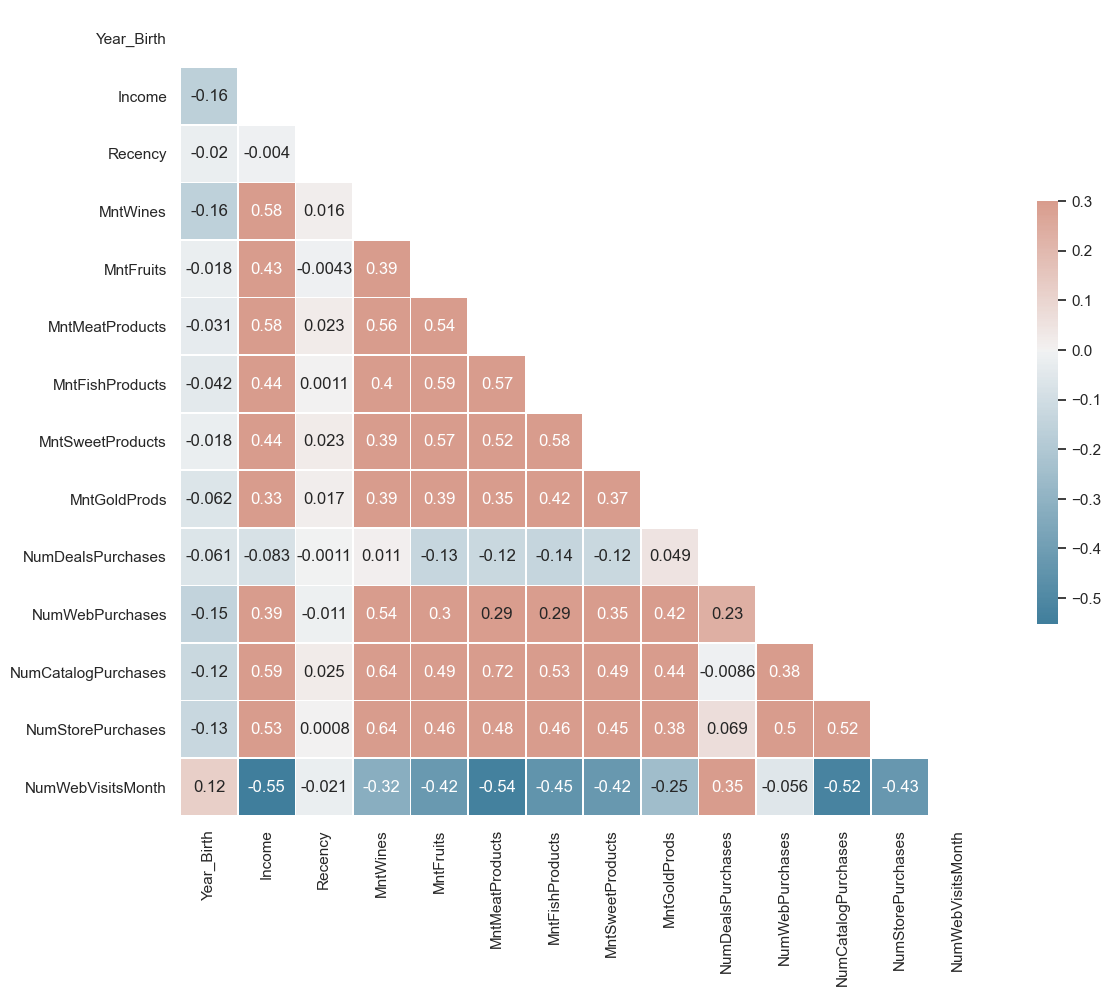

In [16]:
sns.set_theme(style="white")
corr = df[numerical].corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(13, 11))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr,annot=True, mask=mask, cmap=cmap, vmax=0.3, center=0, fmt=".2g",
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

It can be seen that our data are well interconnected with each other, which should have a good effect on our regression, the target value of which will be Income 

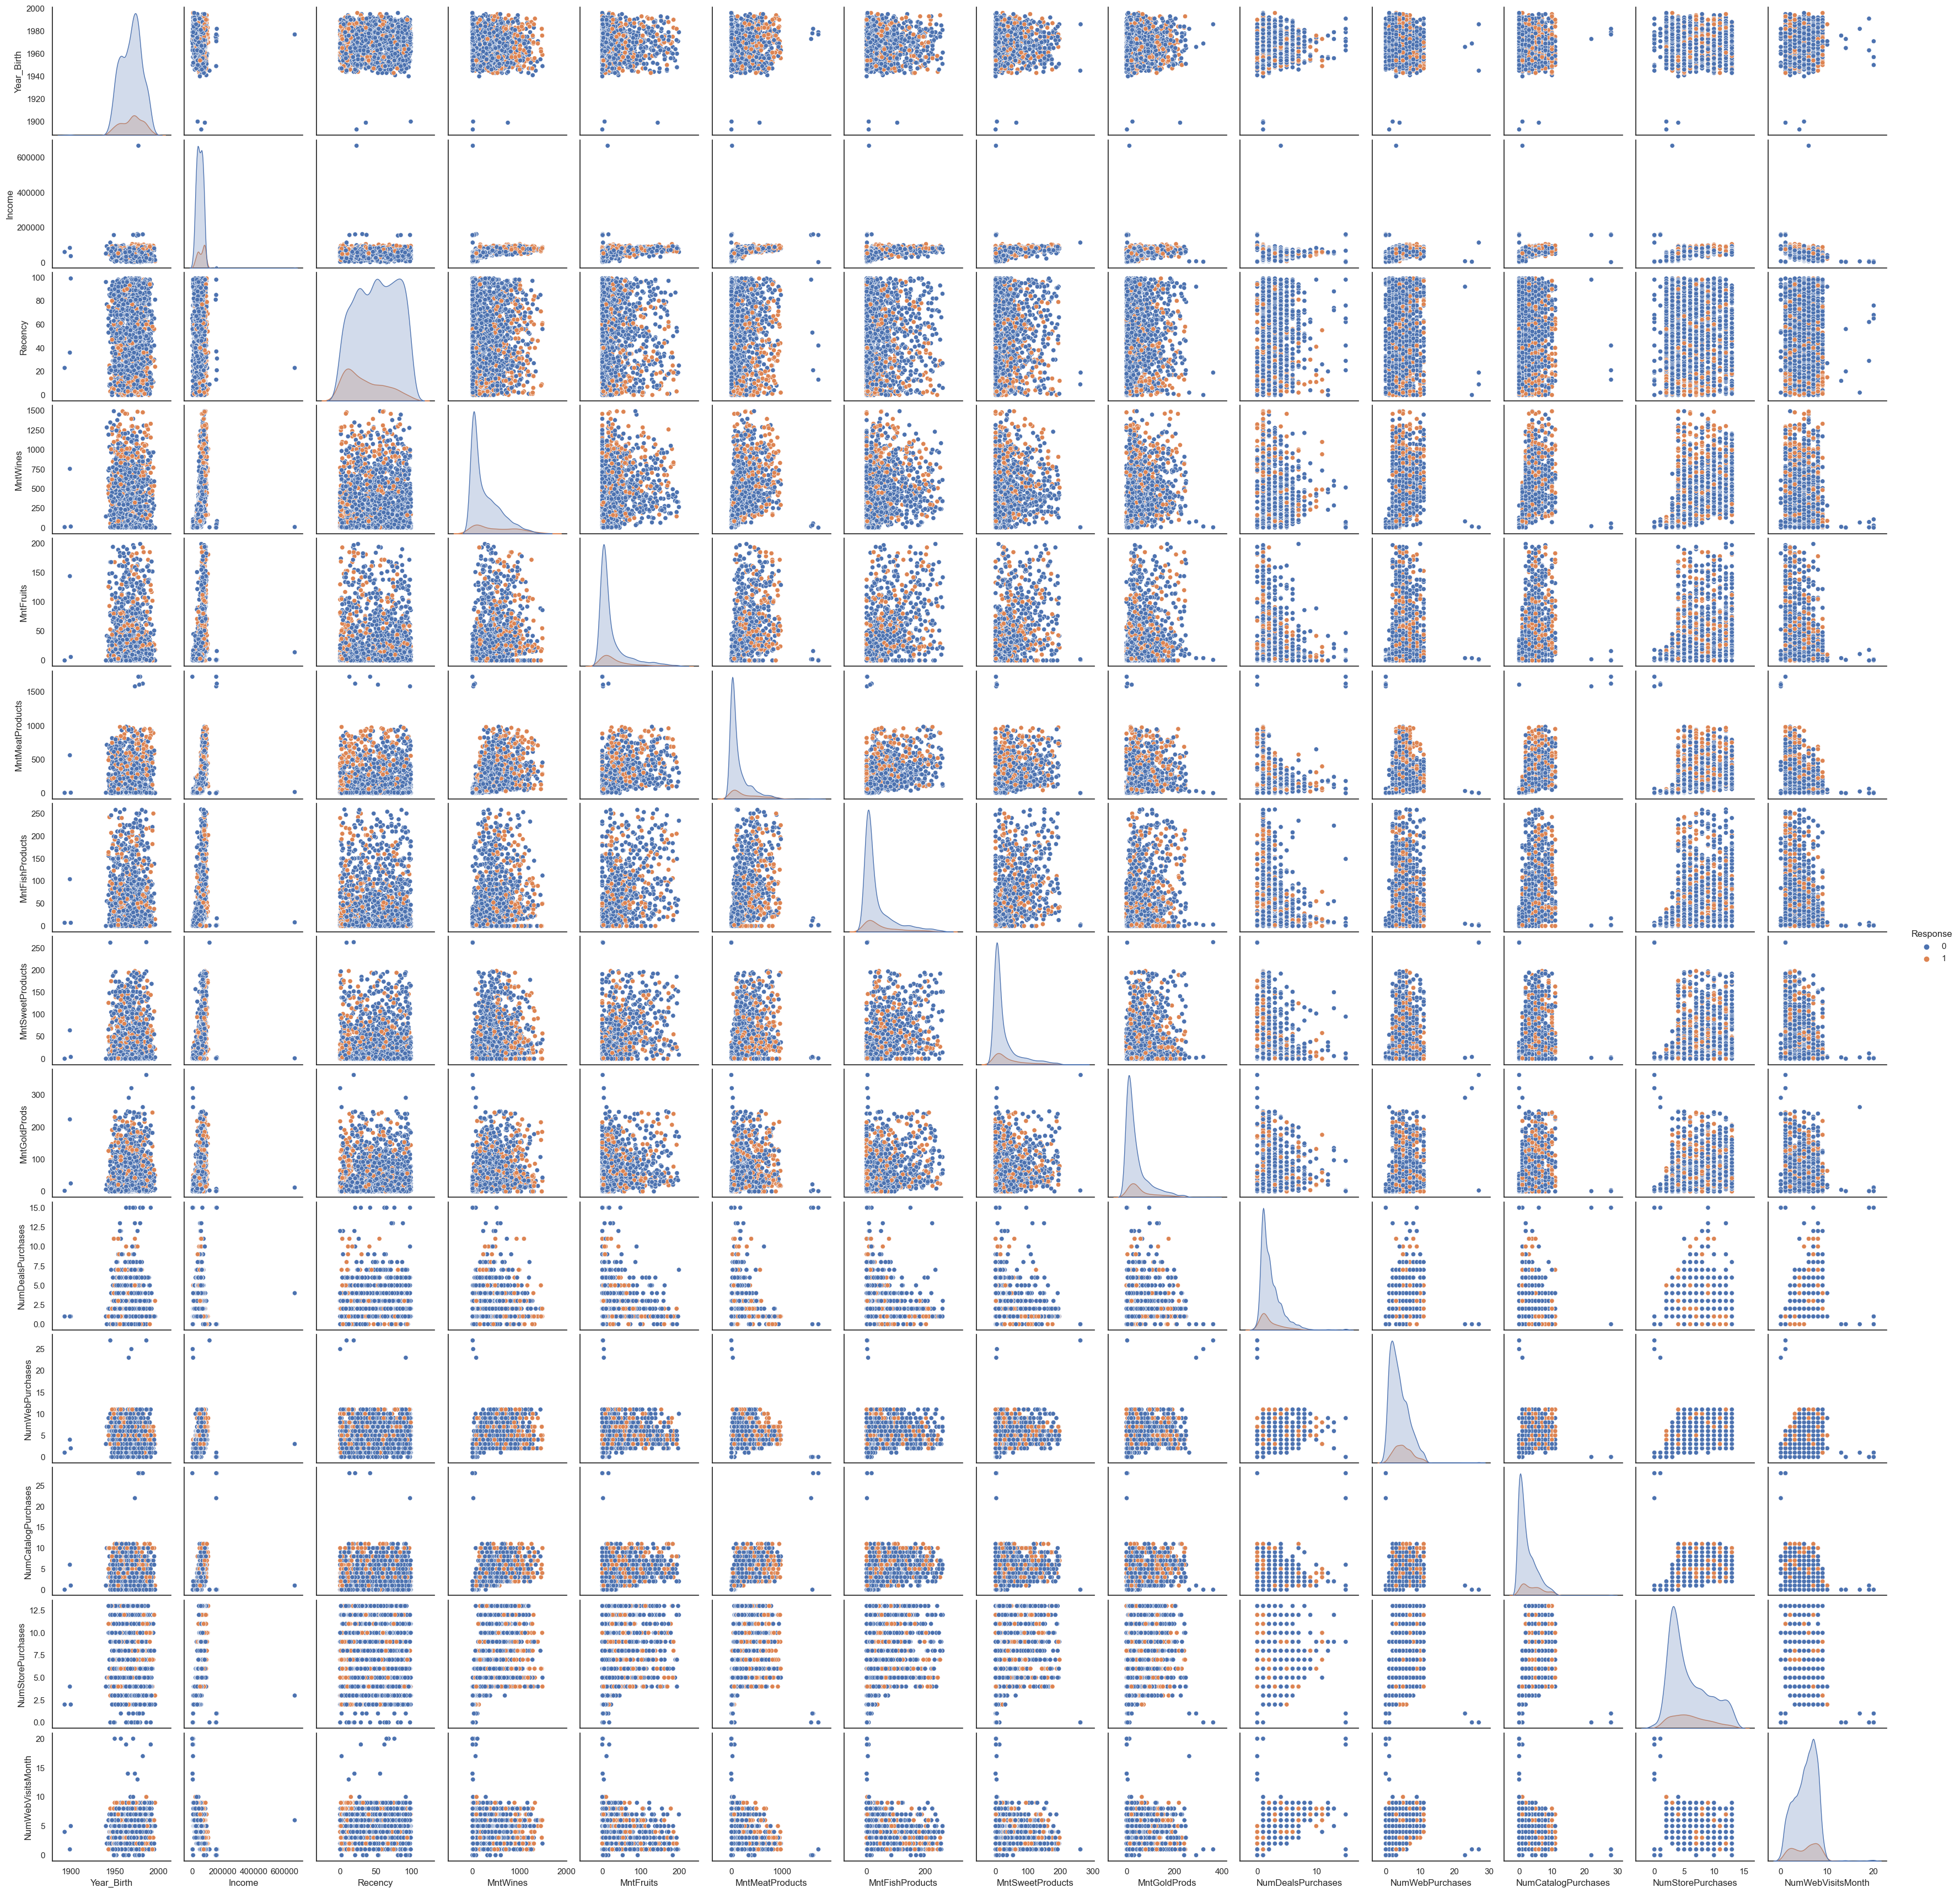

In [21]:
sns.pairplot(data=df[numerical_resp], x_vars=numerical, hue='Response')
plt.show()

After doing a brief analysis of the data, I got a very good dataset that will allow me to train my model, namely a column that will learn using classifications and another column that will learn regression 